__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?




Podemos evaluar funciones en matrices a traves de sus series de Taylor ya que elproducto de matrices está bien definido. 

__Ejercicio 2:__ ¿Como se define una matriz simétrica?



Una matriz simetrica es una matriz $A$ tal que $$ A=\frac{1}{2}(A+A^T)$$

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?



Sea B una matriz cuadrada, entonces tomemos $$ C=\frac{1}{2}(B+B^T)$$



notemos ahora que $C_{ij}=\frac{1}{2}(B_{ij}+B_{ji})=\frac{1}{2}(B_{ji}+B_{ij})=C_{ij}^T=C_{ji}$

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

In [134]:
using Plots

A=[1 1 ; -1 1]
t=linspace(0.01,10,10000)

0.01:0.000999099909990999:10.0

In [160]:

function propagador(A,x,t)
    xt=[]
    for i in 1:length(t)
        v=expm(A*t[i])*x
        push!(xt,v)
    end
    xt
end
        

propagador (generic function with 3 methods)

In [161]:
s=propagador(A,[2,1],t)
x=map(x->x[1],s);
y=map(x->x[2],s);


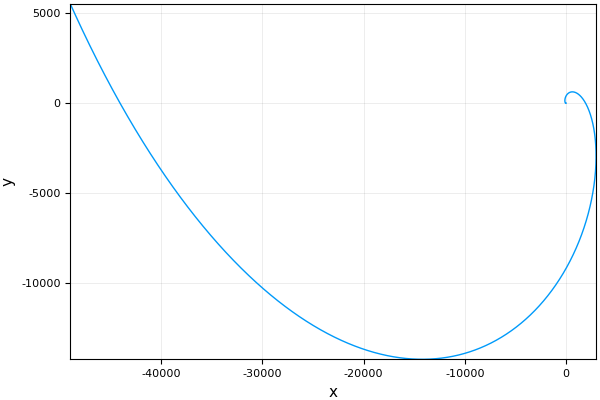

In [162]:
plot(x,y,xlabel="x",ylabel="y",label="")